In [1]:
import json
import pandas as pd
import os

In [2]:
# Specify the prefix
prefix = 'mlp'

# Get the list of files in the current directory
files = os.listdir()

# Filter files that start with the specified prefix
filtered_files = [file for file in files if file.startswith(prefix) and file.endswith('.json')]

In [3]:
filtered_files[0].split('.')[0]

'mlp_bow'

In [4]:
results = {}

for file in filtered_files:
    name = file.split('.')[0]
    print(name)
    with open(file, 'r') as f:
        data = json.load(f)
    results[name] = data

mlp_bow
mlp_notext
mlp_bow_hand
mlp_w2v
mlp_tfidf
mlp_tfidf_hand
mlp_w2v_hand


In [6]:
for file, data in results.items():
    score_order = ['acc', 'precision', 'recall', 'f1']
    for i,d in enumerate(data):
        print(d)
        flattened_params = dict(list(d.items())[0][1].items())
        # print(list(d[1].items())[1][1])
        flattened_scores = dict([(score_order[i], score) for i,score in enumerate(list(d.items())[1][1])])
        data[i] = {**flattened_params, **flattened_scores}

{'params': {'hidden_size': [5], 'l2_reg': 0.001}, 'scores': [0.7243383249172907, 0.5029818771350819, 0.6803728070175439, 0.5783814374646293]}
{'params': {'hidden_size': [5], 'l2_reg': 0.01}, 'scores': [0.722401184050148, 0.5004193123277825, 0.6542919799498746, 0.5671033874142964]}
{'params': {'hidden_size': [5], 'l2_reg': 0.1}, 'scores': [0.2779035347379418, 0.2779035347379418, 1.0, 0.434936639869192]}
{'params': {'hidden_size': [5], 'l2_reg': 1}, 'scores': [0.2779035347379418, 0.2779035347379418, 1.0, 0.434936639869192]}
{'params': {'hidden_size': [5], 'l2_reg': 10}, 'scores': [0.2779035347379418, 0.2779035347379418, 1.0, 0.434936639869192]}
{'params': {'hidden_size': [5], 'l2_reg': 100}, 'scores': [0.2779035347379418, 0.2779035347379418, 1.0, 0.434936639869192]}
{'params': {'hidden_size': [64], 'l2_reg': 0.001}, 'scores': [0.7389865923733241, 0.5218173639226271, 0.7268170426065163, 0.6074888714323122]}
{'params': {'hidden_size': [64], 'l2_reg': 0.01}, 'scores': [0.7305197631899704, 0

In [16]:
for file, data in results.items():
    df = pd.DataFrame(data)
    df['Product'] = df['acc'] * df['recall']
    max_product = df['Product'].max()
    max_index = df['Product'].idxmax()
    max_row = df.loc[max_index]
    print(f'\n{file}:\n')
    print(max_row)



mlp_bow:

hidden_size       [128]
l2_reg            0.001
acc            0.728713
precision      0.508043
recall         0.751958
f1             0.606392
Product        0.547962
num_layers            1
Name: 12, dtype: object

mlp_notext:

hidden_size    [64, 32, 16]
l2_reg                0.001
acc                0.727538
precision          0.506267
recall             0.790883
f1                  0.61735
Product            0.575398
num_layers                3
Name: 24, dtype: object

mlp_bow_hand:

hidden_size    [64, 32]
l2_reg            0.001
acc            0.672558
precision      0.450633
recall         0.813596
f1             0.580011
Product        0.547191
num_layers            2
Name: 18, dtype: object

mlp_w2v:

hidden_size       [128]
l2_reg            0.001
acc            0.650379
precision      0.432642
recall         0.828791
f1             0.568512
Product        0.539028
num_layers            1
Name: 12, dtype: object

mlp_tfidf:

hidden_size    [64, 32]
l2_reg         

/tmp/ipykernel_636085/462021265.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_recall_df = df.groupby('l2_reg')['recall', 'acc'].mean().reset_index()
/tmp/ipykernel_636085/462021265.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_layers_df = df.groupby('num_layers')['recall', 'acc'].mean().reset_index()


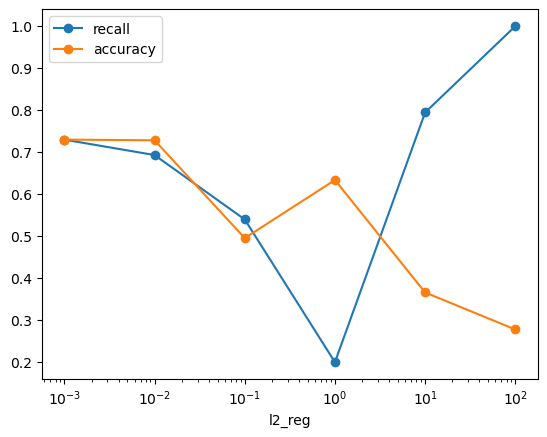

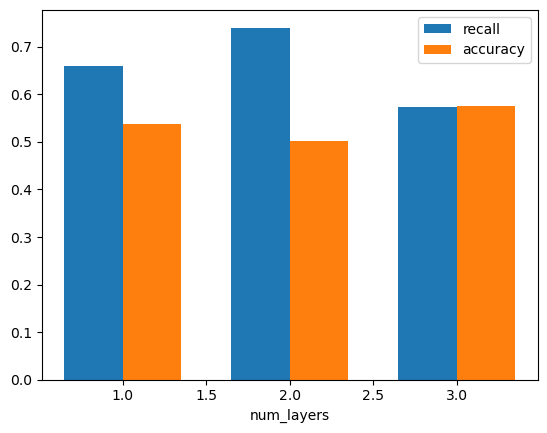


mlp_bow:



/tmp/ipykernel_636085/462021265.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_recall_df = df.groupby('l2_reg')['recall', 'acc'].mean().reset_index()
/tmp/ipykernel_636085/462021265.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_layers_df = df.groupby('num_layers')['recall', 'acc'].mean().reset_index()


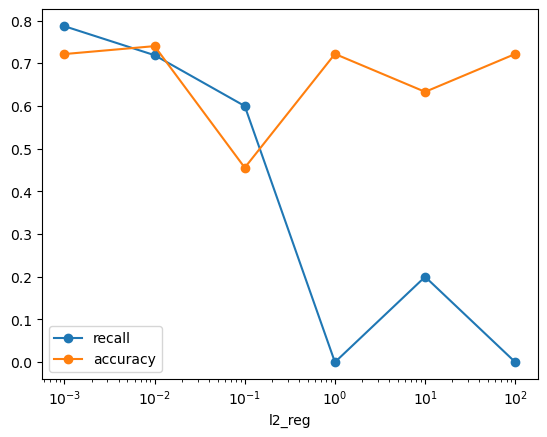

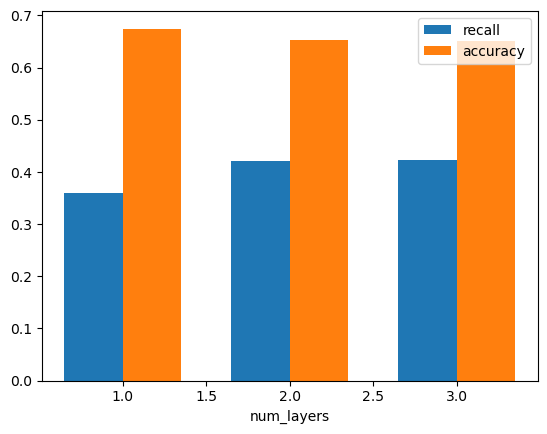


mlp_notext:



/tmp/ipykernel_636085/462021265.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_recall_df = df.groupby('l2_reg')['recall', 'acc'].mean().reset_index()
/tmp/ipykernel_636085/462021265.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_layers_df = df.groupby('num_layers')['recall', 'acc'].mean().reset_index()


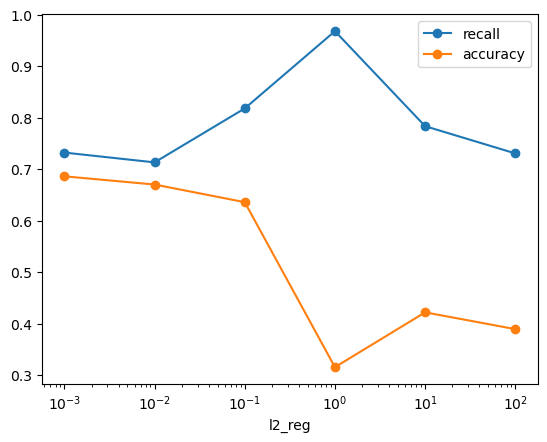

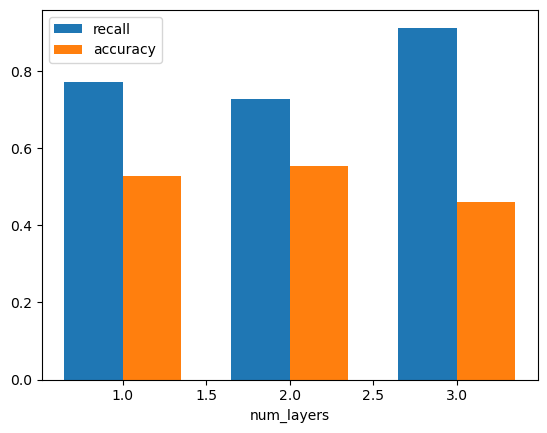


mlp_bow_hand:



/tmp/ipykernel_636085/462021265.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_recall_df = df.groupby('l2_reg')['recall', 'acc'].mean().reset_index()
/tmp/ipykernel_636085/462021265.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_layers_df = df.groupby('num_layers')['recall', 'acc'].mean().reset_index()


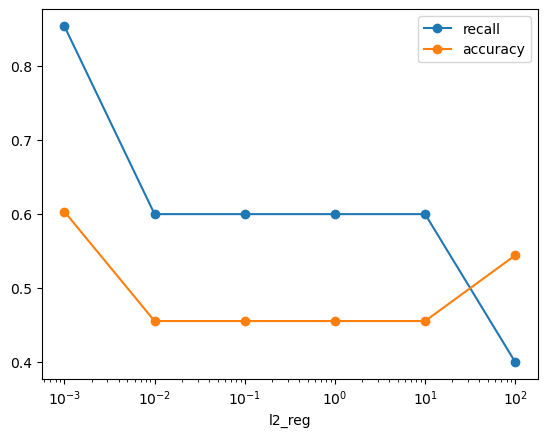

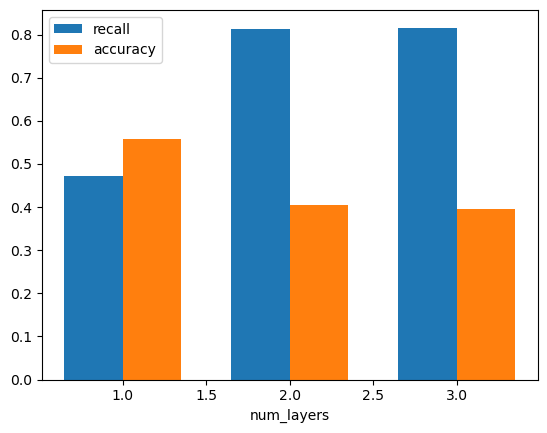


mlp_w2v:



/tmp/ipykernel_636085/462021265.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_recall_df = df.groupby('l2_reg')['recall', 'acc'].mean().reset_index()
/tmp/ipykernel_636085/462021265.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_layers_df = df.groupby('num_layers')['recall', 'acc'].mean().reset_index()


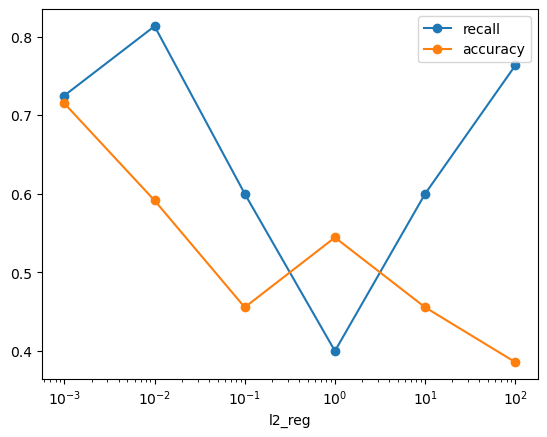

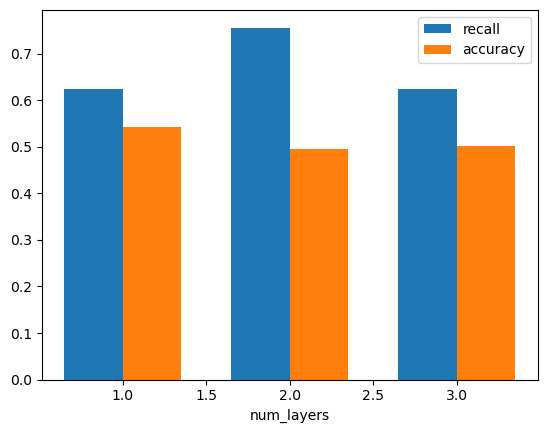


mlp_tfidf:



/tmp/ipykernel_636085/462021265.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_recall_df = df.groupby('l2_reg')['recall', 'acc'].mean().reset_index()
/tmp/ipykernel_636085/462021265.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_layers_df = df.groupby('num_layers')['recall', 'acc'].mean().reset_index()


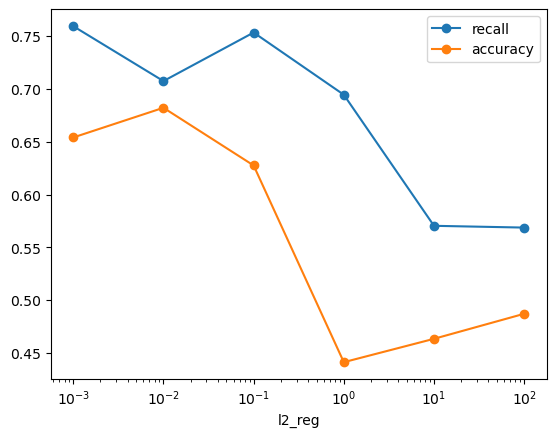

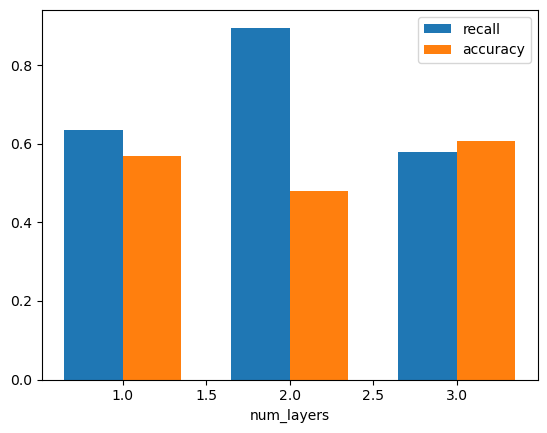


mlp_tfidf_hand:



/tmp/ipykernel_636085/462021265.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_recall_df = df.groupby('l2_reg')['recall', 'acc'].mean().reset_index()
/tmp/ipykernel_636085/462021265.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_layers_df = df.groupby('num_layers')['recall', 'acc'].mean().reset_index()


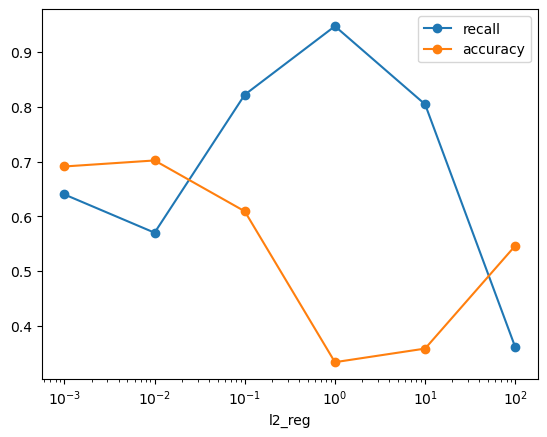

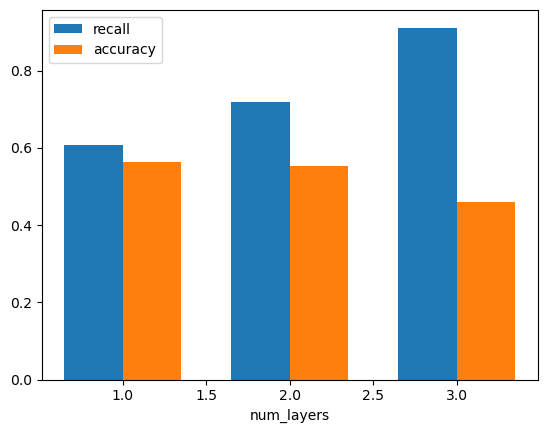


mlp_w2v_hand:



In [20]:
import matplotlib.pyplot as plt
for file, data in results.items():
    df = pd.DataFrame(data)
    df['num_layers'] = df['hidden_size'].apply(len)
    avg_recall_df = df.groupby('l2_reg')['recall', 'acc'].mean().reset_index()
    avg_layers_df = df.groupby('num_layers')['recall', 'acc'].mean().reset_index()

    # Plot average recall vs. l2_reg
    plt.plot(avg_recall_df['l2_reg'], avg_recall_df['recall'], marker='o', label='recall')
    plt.plot(avg_recall_df['l2_reg'], avg_recall_df['acc'], marker='o', label='accuracy')
    plt.xlabel('l2_reg')
    plt.xscale('log')
    plt.legend()
    plt.show()

    # Plot average recall vs. l2_reg
    bar_width = 0.35
    plt.bar(avg_layers_df['num_layers'] - bar_width/2, avg_layers_df['recall'], width=bar_width, label='recall')
    plt.bar(avg_layers_df['num_layers'] + bar_width/2, avg_layers_df['acc'], width=bar_width, label='accuracy')
    plt.xlabel('num_layers')
    plt.legend()
    plt.show()

    print(f'\n{file}:\n')
